In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.DataFrame(pd.read_csv("./playground-series-s4e10/train.csv"))
df.drop(["id"], axis= 1, inplace=True)
column_names = df.columns
m,n = df.shape
print("shape of train data:",df.shape)
print("general info:", df.info())
df.describe()

shape of train data: (58645, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ M

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## 🏦 Loan Prediction Dataset Column Description

| Column Name                        | Description 🌟 | Effect on Loan Decision 📊 |
|------------------------------------|---------------------------------------------|--------------------------------------------------|
| **person_age** 🧑‍🦳🧑‍🦰 | Age of the loan applicant. | Younger applicants may have shorter credit histories, while older applicants may have more financial stability. |
| **person_income** 💰 | Applicant’s annual income. | Higher income increases the likelihood of loan approval, as it suggests better repayment capacity. |
| **person_home_ownership** 🏡 | Whether the applicant owns a home or rents. | Homeowners are often seen as more financially stable, reducing loan risk. |
| **person_emp_length** 🏢⌛ | Number of years the person has been employed. | Longer employment history suggests financial stability and reliability. |
| **loan_intent** 🎯 | Purpose of the loan (education, medical, business, etc.). | Some purposes (e.g., business or medical) might carry higher risk than others (e.g., home improvement). |
| **loan_grade** 🔠 | Creditworthiness rating of the loan (A to F). | A higher grade (A, B) means lower risk and better terms, while lower grades (E, F) indicate higher risk. |
| **loan_amnt** 💸 | Total amount requested for the loan. | Higher amounts increase lender risk, especially if not backed by strong income or credit history. |
| **loan_int_rate** 📉📈 | Interest rate on the loan. | Higher interest rates may indicate higher risk borrowers, affecting affordability. |
| **loan_percent_income** 📊 | Loan amount as a percentage of income. | If the loan is a large portion of the applicant's income, it may signal repayment difficulties. |
| **cb_person_default_on_file** ⚠️📁 | Whether the person has previously defaulted (Yes/No). | A past default history significantly increases loan risk and may lead to rejection. |
| **cb_person_cred_hist_length** ⏳ | Length of the person’s credit history (years). | Longer credit history usually indicates a more reliable borrower. |
| **loan_status** ✅❌ | Whether an applicant is approved for loan (1) or not (0). | Target variable used for predicting loan approval likelihood. |

💡 **Key Insights:**  
- Higher income, homeownership, long employment, and a good credit history **increase** approval chances.  
- High loan amounts, high debt-to-income ratio, or past defaults **increase** the risk of rejection.  
- Loan purpose and grade also play a crucial role in decision-making.  


In [3]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0


In [4]:
len(df[(df["person_age"] < 70) & (df["person_age"] > 18)]["person_age"])/m 


0.999676016710717

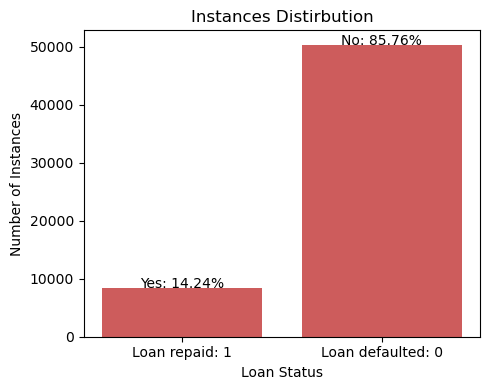

In [5]:
yes_instances = df[df["loan_status"] == 1]
no_instances = df[df["loan_status"] == 0]
n_yes = len(yes_instances)
n_no = len(no_instances)
total = n_no + n_yes

plt.figure(figsize=(5,4))
plt.bar(
    ["Loan repaid: 1", "Loan defaulted: 0"],
    [n_yes, n_no], 
    color = "indianred"  
)

plt.title("Instances Distirbution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Instances")

plt.text(0, n_yes, f'Yes: {n_yes/total :.2%}', ha='center', color='black')
plt.text(1, n_no, f'No: {n_no/total :.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()

In [6]:

# very few (9) of the age values were false, hence we dropped them
def correct_ages(age):
    if age >70 or age < 18:
        return np.nan
    else:
        return age

df["person_age"] = df["person_age"].apply(correct_ages)
df.dropna(inplace=True)

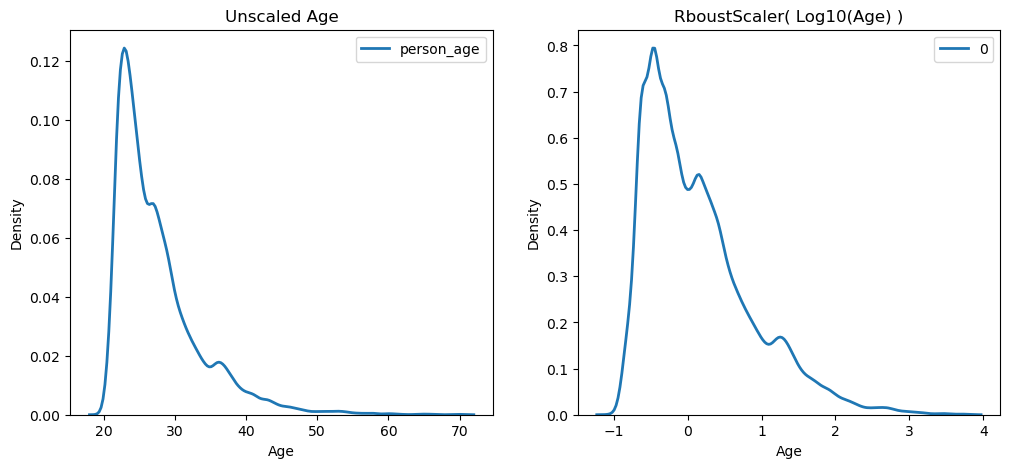

We assume that a person over 70 will have no interest in taking a loan!!
Take Log10 of the column due to being highly skewed, then standardizing using RboustScaler 


In [7]:

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["person_age"]], linewidth=2, ax=axs[0])
axs[0].set_title("Unscaled Age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.log10(df[["person_age"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( Log10(Age) )")
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Density")

plt.show()


print("We assume that a person over 70 will have no interest in taking a loan!!")
print("Take Log10 of the column due to being highly skewed, then standardizing using RboustScaler ")

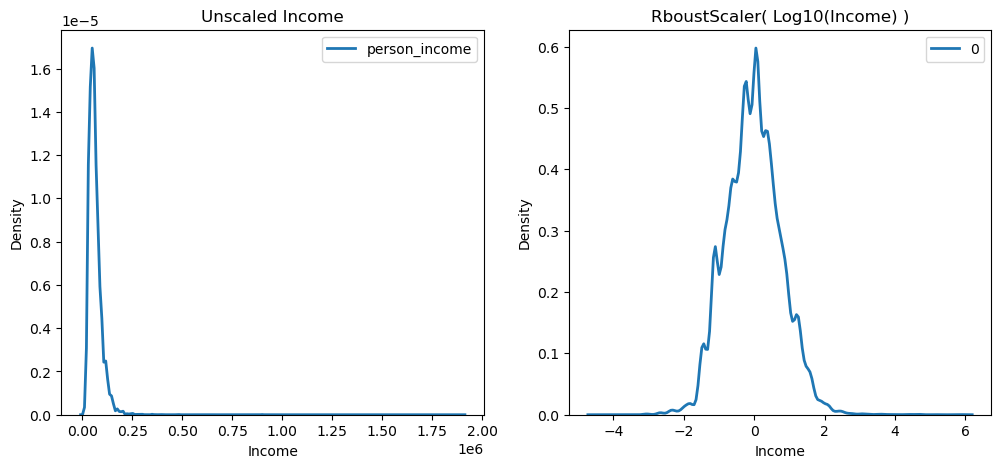

Take Log10(1+x) of the column due to being highly skewed, then standardizing using RboustScaler 


In [8]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["person_income"]], linewidth=2, ax=axs[0])
axs[0].set_title("Unscaled Income")
axs[0].set_xlabel("Income")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.log10(1+df[["person_income"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( Log10(Income) )")
axs[1].set_xlabel("Income")
axs[1].set_ylabel("Density")
plt.show()

print("Take Log10(1+x) of the column due to being highly skewed, then standardizing using RboustScaler ")

In [9]:
    
# people over 50 can not have strted working under the age of 18, hence 32 years of employee length
# 4 outliers will be removed

def correct_emplength(row):
    if row["person_age"] < 50 and row["person_emp_length"] > 32:
        return np.nan
    else:
        return row["person_emp_length"]


  
df["person_emp_length"] = df.apply(correct_emplength,axis=1)
df.dropna(inplace=True)


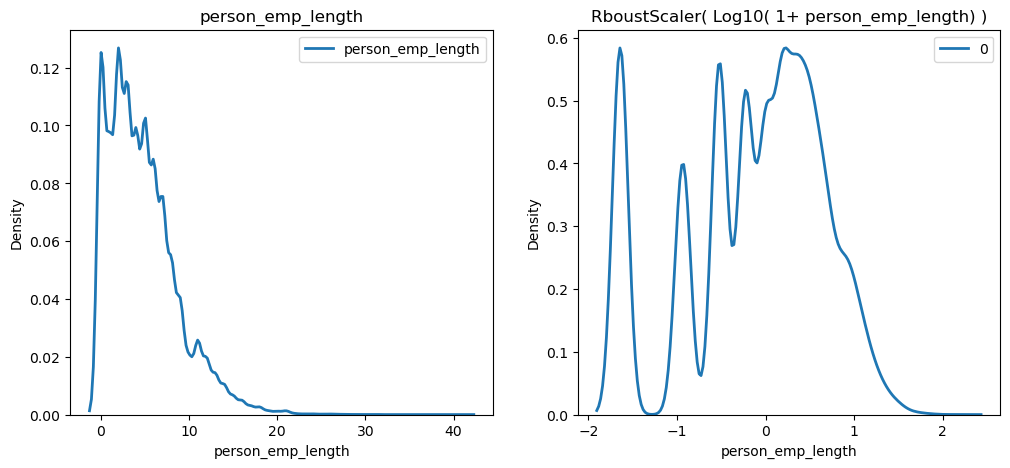

Take Log10(1+x) of the column due to being highly skewed, then standardizing using RboustScaler 


In [10]:

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["person_emp_length"]], linewidth=2, ax=axs[0])
axs[0].set_title("person_emp_length")
axs[0].set_xlabel("person_emp_length")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.log10(1+df[["person_emp_length"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( Log10( 1+ person_emp_length) )")
axs[1].set_xlabel("person_emp_length")
axs[1].set_ylabel("Density")
plt.show()

print("Take Log10(1+x) of the column due to being highly skewed, then standardizing using RboustScaler ")


Text(0, 0.5, 'Density')

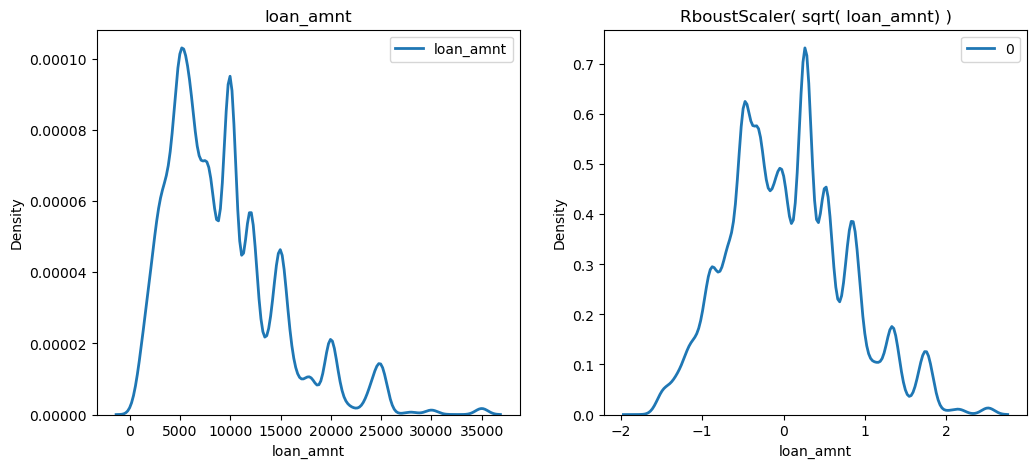

In [11]:

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["loan_amnt"]], linewidth=2, ax=axs[0])
axs[0].set_title("loan_amnt")
axs[0].set_xlabel("loan_amnt")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.sqrt(df[["loan_amnt"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( sqrt( loan_amnt) )")
axs[1].set_xlabel("loan_amnt")
axs[1].set_ylabel("Density")

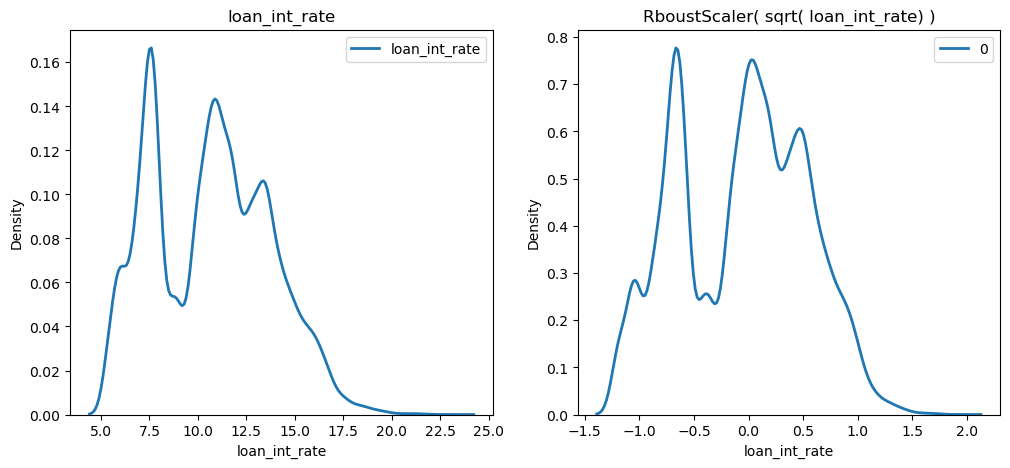

Take sqrt of the column due to being highly skewed, then standardizing using RboustScaler 


In [12]:

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["loan_int_rate"]], linewidth=2, ax=axs[0])
axs[0].set_title("loan_int_rate")
axs[0].set_xlabel("loan_int_rate")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.sqrt(df[["loan_int_rate"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( sqrt( loan_int_rate) )")
axs[1].set_xlabel("loan_int_rate")
axs[1].set_ylabel("Density")
plt.show()

print("Take sqrt of the column due to being highly skewed, then standardizing using RboustScaler ")

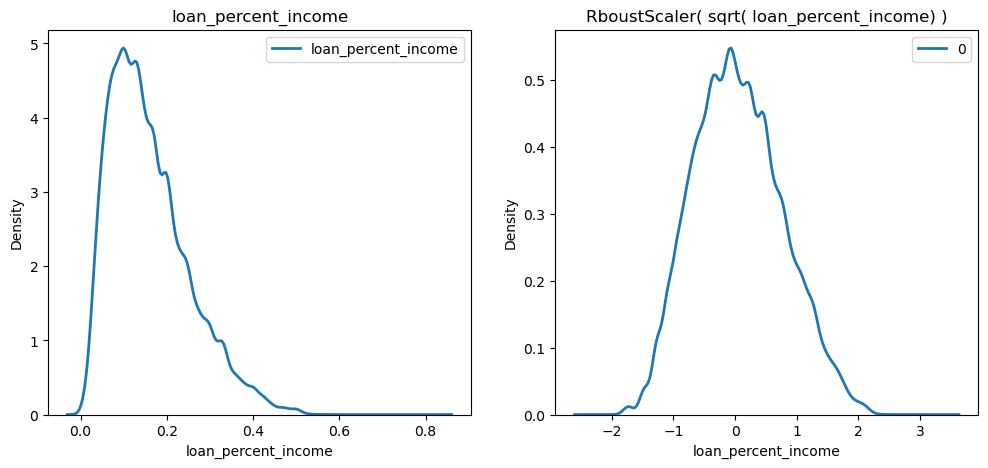

Take sqrt(x) of the column due to being highly skewed, then standardizing using RboustScaler 


In [13]:

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["loan_percent_income"]], linewidth=2, ax=axs[0])
axs[0].set_title("loan_percent_income")
axs[0].set_xlabel("loan_percent_income")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.sqrt(df[["loan_percent_income"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( sqrt( loan_percent_income) )")
axs[1].set_xlabel("loan_percent_income")
axs[1].set_ylabel("Density")
plt.show()

print("Take sqrt(x) of the column due to being highly skewed, then standardizing using RboustScaler ")

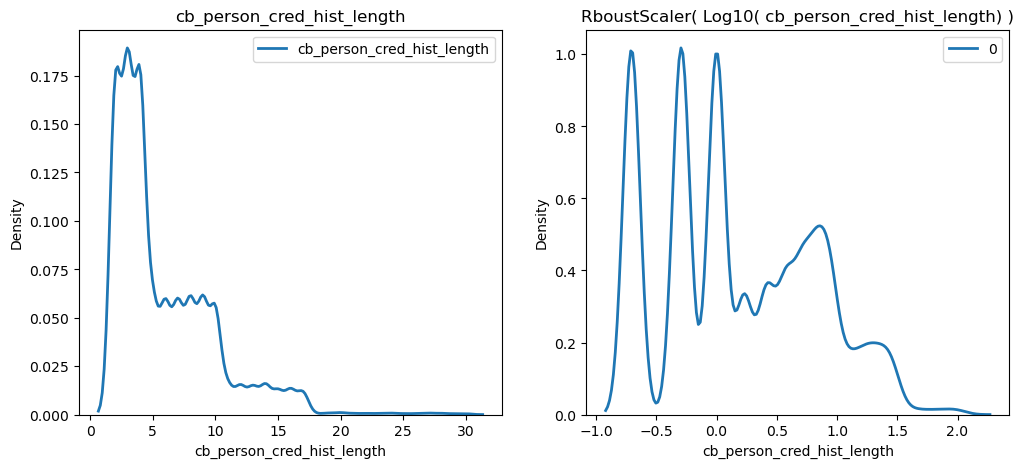

Take Log10(1+x) of the column due to being highly skewed, then standardizing using RboustScaler 


In [14]:


fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.kdeplot(df[["cb_person_cred_hist_length"]], linewidth=2, ax=axs[0])
axs[0].set_title("cb_person_cred_hist_length")
axs[0].set_xlabel("cb_person_cred_hist_length")
axs[0].set_ylabel("Density")

sns.kdeplot(RobustScaler().fit_transform(np.log10(df[["cb_person_cred_hist_length"]])), linewidth=2, ax=axs[1])
axs[1].set_title("RboustScaler( Log10( cb_person_cred_hist_length) )")
axs[1].set_xlabel("cb_person_cred_hist_length")
axs[1].set_ylabel("Density")
plt.show()

print("Take Log10(1+x) of the column due to being highly skewed, then standardizing using RboustScaler ")

In [15]:
						

df["person_age"] = RobustScaler().fit_transform(np.log10(df[["person_age"]]))
df["person_income"] = RobustScaler().fit_transform(np.log10(df[["person_income"]]))
df["person_emp_length"] = RobustScaler().fit_transform(np.log10(1+df[["person_emp_length"]]))
df["loan_amnt"] = RobustScaler().fit_transform(np.sqrt(df[["loan_amnt"]]))
df["loan_int_rate"] = RobustScaler().fit_transform(np.sqrt(df[["loan_int_rate"]]))
df["loan_percent_income"] = RobustScaler().fit_transform(np.sqrt(df[["loan_percent_income"]]))
df["cb_person_cred_hist_length"] = RobustScaler().fit_transform(np.log10(df[["cb_person_cred_hist_length"]]))



In [16]:
def label_encode_grades(alphabet):
    grade = {
        "A" : 7,
        "B" : 6,
        "C" : 5,
        "D" : 4,
        "E" : 3,
        "F" : 2,
        "G" : 1
    }
    return grade[alphabet]

def label_encode_defaulted(bool_word):
    bool_value = {
       "Y" : 1,
       "N" : 0 
    }
    return bool_value[bool_word]
    

df["loan_grade"] = df["loan_grade"].apply(lambda x : label_encode_grades(x))
df["cb_person_default_on_file"] = df["cb_person_default_on_file"].apply(lambda x : label_encode_defaulted(x))
df.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,1.327878,-0.859317,RENT,-1.640895,EDUCATION,6,-0.308572,0.139231,0.24103,0,1.277249,0


In [17]:
df["person_age"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
58640    False
58641    False
58642    False
58643    False
58644    False
Name: person_age, Length: 58632, dtype: bool

In [18]:


column_names = df.columns
final_df  = pd.get_dummies(df, columns=['person_home_ownership','loan_intent']).astype(np.float64)



In [19]:
tmp = final_df["loan_status"]
final_df.drop(["loan_status"], inplace=True, axis=1)
final_df["loan_status"] = tmp
final_df.head(2)


,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,1.327878,-0.859317,-1.640895,6.0,-0.308572,0.139231,0.241030,0.0,1.277249,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.628724,-0.059701,0.343049,5.0,-0.674596,0.470554,-0.692483,0.0,-0.706695,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import SMOTE
df = final_df
sm = SMOTE(random_state=42)
column_names = list(df.columns)
y_train = df["loan_status"]
X_train = df.drop(["loan_status"], axis=1)
X_resem, y_resem = sm.fit_resample(X_train, y_train)
combined_df = pd.concat([X_resem, y_resem], axis=1)

column_mapping = {old: new for old, new in zip(combined_df.columns, column_names)}
combined_df.rename(columns=column_mapping, inplace=True)
combined_df.head(1)

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,1.327878,-0.859317,-1.640895,6.0,-0.308572,0.139231,0.24103,0.0,1.277249,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df = combined_df.copy(deep=True)

In [22]:
df.to_csv("./playground-series-s4e10/cleaned_train.csv", index=False)

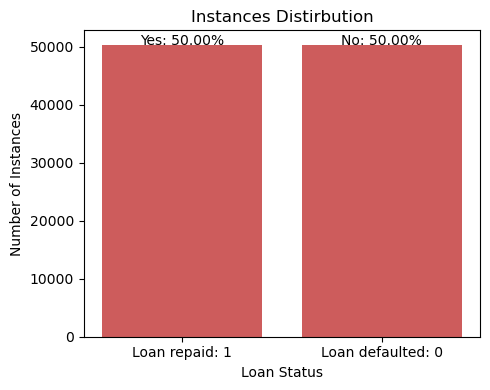

In [23]:
yes_instances = df[df["loan_status"] == 1]
no_instances = df[df["loan_status"] == 0]
n_yes = len(yes_instances)
n_no = len(no_instances)
total = n_no + n_yes

plt.figure(figsize=(5,4))
plt.bar(
    ["Loan repaid: 1", "Loan defaulted: 0"],
    [n_yes, n_no], 
    color = "indianred"  
)

plt.title("Instances Distirbution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Instances")

plt.text(0, n_yes, f'Yes: {n_yes/total :.2%}', ha='center', color='black')
plt.text(1, n_no, f'No: {n_no/total :.2%}', ha='center', color='black')

plt.tight_layout()
plt.show()